In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv("trainingdata.csv", sep='\t')

In [3]:
data

,Protein(Ensembl),Standard Name,Median molecules per cell,iCUB,tAI,T3s,C3s,A3s,G3s,CAI_CODONW,...,B_SELF,B_REF,MCB_SELF,MCB_REF,ENC,ENC_prime_SELF,ENC_prime_REF,SCUO,Sc,St
0,Q0045,COX1,2440.185180,20.000000,0.263348,0.4643,0.1029,0.5963,0.0243,0.140,...,0.684210,0.709338,0.655096,1.272299,29.677005,39.382219,31.019228,0.470291,0.0501,0.0466
1,Q0050,AI1,353.115265,20.000000,0.227877,0.5138,0.0639,0.6199,0.0731,0.123,...,0.606760,0.745491,0.716911,1.720744,31.196244,41.134389,29.659266,0.433817,0.0305,-0.0029
2,Q0055,AI2,271.000000,20.000000,0.242131,0.5508,0.0932,0.5525,0.0861,0.156,...,0.571755,0.696837,0.610044,1.211397,34.271551,44.968103,34.359532,0.413052,-0.0125,0.0261
3,Q0060,AI3,1029.000000,20.000000,0.199791,0.6140,0.0205,0.6282,0.0329,0.122,...,0.717329,0.805724,0.559649,1.229915,30.148220,41.066808,32.253606,0.613125,-0.1690,-0.0255
4,Q0065,AI4,127.841591,20.000000,0.227440,0.5229,0.0479,0.6540,0.0328,0.121,...,0.689977,0.755224,0.713514,1.541809,29.358191,38.611709,29.203257,0.538448,-0.0295,-0.0024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,YPR194C,OPT2,1687.562770,43.355429,0.253003,0.4759,0.2290,0.3722,0.2016,0.156,...,0.202158,0.494320,0.134721,0.903827,48.820023,60.162829,40.577342,0.106397,-0.0631,0.0296
5384,YPR196W,YPR196W,574.218955,45.073364,0.218408,0.4557,0.2057,0.3836,0.2578,0.120,...,0.312689,0.568975,0.209897,1.661648,54.077562,56.536288,30.564110,0.103168,-0.0244,0.0011
5385,YPR198W,SGE1,1234.084813,42.675432,0.234304,0.4095,0.1983,0.4314,0.1884,0.096,...,0.281572,0.608293,0.249405,1.661585,51.448536,53.428351,27.464823,0.111419,-0.0025,0.0180
5386,YPR199C,ARR1,1156.795686,41.489255,0.222252,0.4506,0.1760,0.3879,0.2879,0.102,...,0.368084,0.617498,0.257011,1.472563,54.099795,54.864759,27.230178,0.143207,0.0555,0.0138


In [4]:
profile = ProfileReport(data, title="Profiling Report", explorative=True)

In [5]:
# profile.to_widgets() # shows inline
profile.to_file("report.html") # exports to a HTML file

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 3:].values
y = data['Median molecules per cell'].values
y = np.log10(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=137)

In [7]:
from tpot import TPOTRegressor

model = TPOTRegressor(generations=50,
                     population_size=20,
                     random_state=137,
                     verbosity=2,
                     scoring='r2',
                     cv=10,
                     n_jobs=-1)

model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/1020 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6399742993539206

Generation 2 - Current best internal CV score: 0.6399742993539206

Generation 3 - Current best internal CV score: 0.6410892672238705

Generation 4 - Current best internal CV score: 0.6410892672238705

Generation 5 - Current best internal CV score: 0.6410892672238705

Generation 6 - Current best internal CV score: 0.6437057234748691

Generation 7 - Current best internal CV score: 0.6441795663065151

Generation 8 - Current best internal CV score: 0.6441795663065151

Generation 9 - Current best internal CV score: 0.6451196482992367

Generation 10 - Current best internal CV score: 0.6451196482992367

Generation 11 - Current best internal CV score: 0.6451196482992367

Generation 12 - Current best internal CV score: 0.6451196482992367

Generation 13 - Current best internal CV score: 0.6465907291297082

Generation 14 - Current best internal CV score: 0.6465907291297082

Generation 15 - Current best internal CV score: 0.646590

TPOTRegressor(cv=10, generations=50, n_jobs=-1, population_size=20,
              random_state=137, scoring='r2', verbosity=2)

In [8]:
model.export('exported_pipeline.py')

In [9]:
predict_valid = model.predict(X_valid)

In [10]:
from sklearn.metrics import median_absolute_error, r2_score

print("R2 score: ", r2_score(y_valid, predict_valid))
print("Median absolute error: ", median_absolute_error(y_valid, predict_valid))

R2 score:  0.6435210517122955
Median absolute error:  0.17188328567819755


In [11]:
from scipy import stats

pearson = stats.pearsonr(y_valid, predict_valid)
spearman = stats.spearmanr(y_valid, predict_valid)

print('\n')
print('CORRELATION BETWEEN EXPERIMENTAL DATA AND PREDICTED VALUES', '\n')
print('Pearson\'s r:', pearson[0], 'p-value:', pearson[1])
print('Spearman\'s r:', spearman[0], 'p-value:', spearman[1], '\n')



CORRELATION BETWEEN EXPERIMENTAL DATA AND PREDICTED VALUES 

Pearson's r: 0.802275339286787 p-value: 2.476804004786165e-243
Spearman's r: 0.7535234970348518 p-value: 3.22253060623468e-198 



<Axes: xlabel='Known abundance', ylabel='Predicted abundance'>

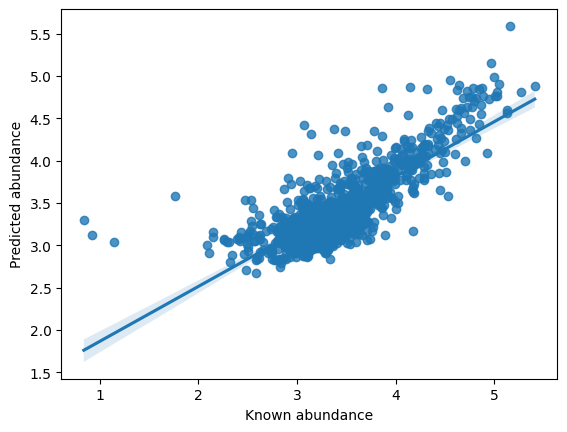

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = pd.DataFrame()
plot_data['Known abundance'] = y_valid
plot_data['Predicted abundance'] = predict_valid

sns.regplot(x='Known abundance', y='Predicted abundance', data=plot_data)

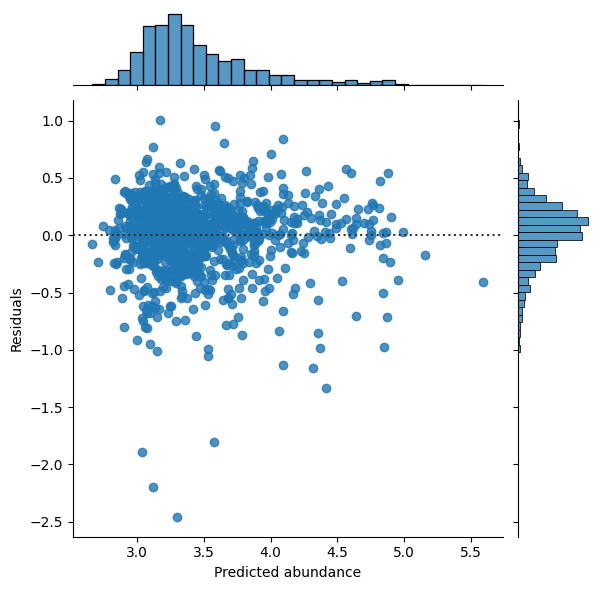

In [13]:
residuals = y_valid - predict_valid

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals
plot_data['Predicted abundance'] = predict_valid

sns.jointplot(y='Residuals', x='Predicted abundance', data=plot_data, kind="resid")

In [14]:
pred_data = pd.read_csv("pred_spombe.csv", sep='\t')

In [15]:
pred_data

,Protein(Ensembl),Standard Name,Median molecules per cell,iCUB,tAI,T3s,C3s,A3s,G3s,CAI_CODONW,...,B_SELF,B_REF,MCB_SELF,MCB_REF,ENC,ENC_prime_SELF,ENC_prime_REF,SCUO,Sc,St
0,SPAC23A1.10,NaN,1.124757e+06,43.180608,0.372898,0.5112,0.4609,0.0659,0.2188,0.428,...,0.826697,0.543790,1.215784,0.520936,29.447815,30.745673,40.910870,0.533168,-1.2059,0.0324
1,SPBC19C2.07,NaN,1.025542e+06,36.680012,0.368837,0.3662,0.5951,0.0679,0.2231,0.358,...,0.957924,0.687804,1.572705,0.797711,28.096568,25.863608,38.863225,0.586506,-1.1073,0.0291
2,SPBC32F12.11,NaN,1.017701e+06,26.655869,0.347360,0.3772,0.5872,0.0352,0.1940,0.431,...,0.923136,0.686368,1.262944,0.530794,30.340355,28.383533,40.838858,0.544378,-1.1852,0.0111
3,SPCC13B11.01,NaN,8.393081e+05,28.534924,0.335952,0.4377,0.5302,0.0520,0.1935,0.358,...,0.858617,0.606428,1.189879,0.750674,30.269076,28.811589,37.335991,0.518205,-1.3156,-0.0017
4,SPBC1815.01,NaN,8.155752e+05,28.220603,0.362195,0.4335,0.5289,0.0466,0.2373,0.351,...,0.899113,0.635993,1.415025,0.729577,29.377926,27.645856,39.793512,0.540629,-1.2663,0.0254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,SPAC13G6.01c,NaN,4.838158e+01,31.407280,0.222565,0.4950,0.1781,0.3942,0.2193,0.142,...,0.194904,0.590395,0.140678,1.422699,48.609402,58.245049,34.064982,0.141682,-0.1005,0.0132
3001,SPBC36B7.09,NaN,3.678736e+01,32.219882,0.240986,0.5000,0.1759,0.4000,0.2002,0.136,...,0.129883,0.540993,0.056642,1.242359,50.111084,60.884588,36.335832,0.114971,-0.1063,0.0338
3002,SPCC5E4.06,NaN,3.470523e+01,40.778401,0.248156,0.4905,0.1679,0.4047,0.2405,0.123,...,0.184882,0.550779,0.156746,1.410171,48.948321,57.665164,32.557285,0.127494,-0.0953,0.0246
3003,SPBC365.15,NaN,3.166926e+01,32.503147,0.216263,0.4805,0.1954,0.3801,0.2303,0.106,...,0.222574,0.554710,0.201211,1.533524,52.269813,55.880962,30.035429,0.112323,-0.1073,-0.0037


In [16]:
X_pred = pred_data.iloc[:, 3:].values
y_pred = pred_data['Median molecules per cell'].values
y_pred = np.log10(y_pred)

In [17]:
predict_spombe = model.predict(X_pred)

In [18]:
print("R2 score: ", r2_score(y_pred, predict_spombe))
print("Median absolute error: ", median_absolute_error(y_pred, predict_spombe))

R2 score:  0.39349340055410176
Median absolute error:  0.3722255256089917


In [19]:
pearson = stats.pearsonr(y_pred, predict_spombe)
spearman = stats.spearmanr(y_pred, predict_spombe)

print('\n')
print('CORRELATION BETWEEN EXPERIMENTAL DATA AND PREDICTED VALUES', '\n')
print('Pearson\'s r:', pearson[0], 'p-value:', pearson[1])
print('Spearman\'s r:', spearman[0], 'p-value:', spearman[1], '\n')



CORRELATION BETWEEN EXPERIMENTAL DATA AND PREDICTED VALUES 

Pearson's r: 0.7334101881445322 p-value: 0.0
Spearman's r: 0.7043676551048007 p-value: 0.0 



<Axes: xlabel='Known abundance', ylabel='Predicted abundance'>

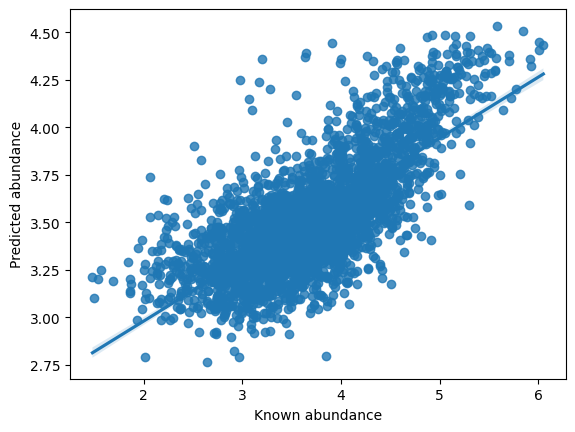

In [20]:
plot_data = pd.DataFrame()
plot_data['Known abundance'] = y_pred
plot_data['Predicted abundance'] = predict_spombe

sns.regplot(x='Known abundance', y='Predicted abundance', data=plot_data)

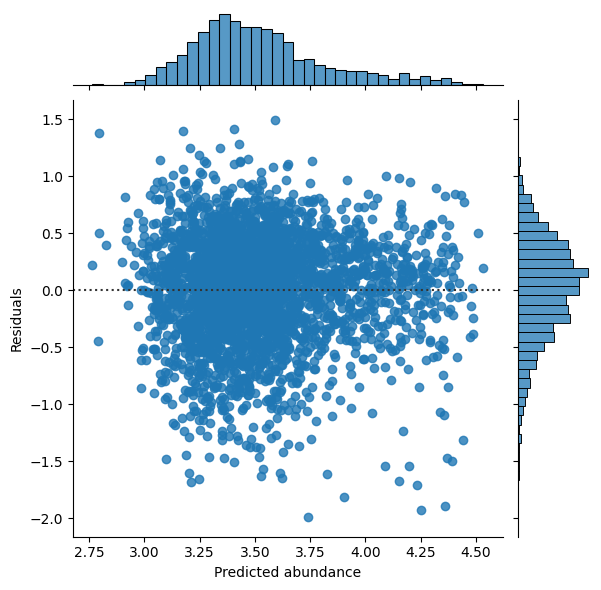

In [21]:
residuals = y_pred - predict_spombe

plot_data = pd.DataFrame()
plot_data['Residuals'] = residuals
plot_data['Predicted abundance'] = predict_spombe

sns.jointplot(y='Residuals', x='Predicted abundance', data=plot_data, kind="resid")